# 0.0 Importd

In [1]:
import pandas as pd
import inflection
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0.1 Loading Data

In [2]:
df_raw = pd.read_csv('../data/df_ready.csv')

In [3]:
df_raw = df_raw.drop(columns={  'Unnamed: 0', 'Date_imp', 'Cluster', 'condition', 'sourceURLs', 'Date_imp_d.1', 
                                'Zscore_1', 'price_std', 'imageURLs', 'shipping', 'weight', 'currency'})

In [4]:
df_raw.head()

,Date_imp_d,Category_name,name,price,disc_price,merchant,Disc_percentage,isSale,Imp_count,brand,p_description,dateAdded,dateSeen,dateUpdated,manufacturer,Day_n,month,month_n,day,Week_Number
0,2017/12/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,64.99,Walmart.com,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,12,December,14,50
1,2017/09/08,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,69.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,Boytone,Friday,9,September,8,36
2,2017/10/24,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,66.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-10-24T04:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,10,October,24,43
3,2017/08/15,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,74.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-08-15T15:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,8,August,15,33
4,2017/09/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-14T21:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,9,September,14,37


# 1.0 Descrição dos Dados

In [5]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [6]:
df1.columns

Index(['Date_imp_d', 'Category_name', 'name', 'price', 'disc_price',
       'merchant', 'Disc_percentage', 'isSale', 'Imp_count', 'brand',
       'p_description', 'dateAdded', 'dateSeen', 'dateUpdated', 'manufacturer',
       'Day_n', 'month', 'month_n', 'day', 'Week_Number'],
      dtype='object')

In [7]:
cols_old = ['Date_imp_d', 'Category_name', 'name', 'price', 'disc_price', 'merchant', 'Disc_percentage', 'isSale', 'Imp_count', 
            'brand', 'p_description', 'dateAdded', 'dateSeen', 'dateUpdated', 'manufacturer', 'Day_n', 'month', 'month_n', 'day', 
            'Week_Number']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map (snakecase, cols_old) )

#Rename
df1.columns = cols_new

In [8]:
df1.columns

Index(['date_imp_d', 'category_name', 'name', 'price', 'disc_price',
       'merchant', 'disc_percentage', 'is_sale', 'imp_count', 'brand',
       'p_description', 'date_added', 'date_seen', 'date_updated',
       'manufacturer', 'day_n', 'month', 'month_n', 'day', 'week_number'],
      dtype='object')

## 1.2. Data Dimensions

In [9]:
print(f'Numero de Linhas: {df1.shape[0]}')
print(f'Numero de Colunas: {df1.shape[1]}')

Numero de Linhas: 23151
Numero de Colunas: 20


## 1.3. Data Types

In [10]:
df1.dtypes

date_imp_d          object
category_name       object
name                object
price              float64
disc_price         float64
merchant            object
disc_percentage    float64
is_sale             object
imp_count            int64
brand               object
p_description       object
date_added          object
date_seen           object
date_updated        object
manufacturer        object
day_n               object
month                int64
month_n             object
day                  int64
week_number          int64
dtype: object

## 1.4. Check NA

In [11]:
df1.isna().sum()

date_imp_d             0
category_name          0
name                   0
price                  0
disc_price             0
merchant               0
disc_percentage        0
is_sale                0
imp_count              0
brand                  0
p_description          0
date_added             0
date_seen              0
date_updated           0
manufacturer       10639
day_n                  0
month                  0
month_n                0
day                    0
week_number            0
dtype: int64

## 1.5. Change Types

In [12]:
df1['date_imp_d'] = pd.to_datetime(df1['date_imp_d'])

In [13]:
df1.dtypes

date_imp_d         datetime64[ns]
category_name              object
name                       object
price                     float64
disc_price                float64
merchant                   object
disc_percentage           float64
is_sale                    object
imp_count                   int64
brand                      object
p_description              object
date_added                 object
date_seen                  object
date_updated               object
manufacturer               object
day_n                      object
month                       int64
month_n                    object
day                         int64
week_number                 int64
dtype: object

## 1.6. Descriptive Statistical

In [14]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### 1.6.1. Numerical Attributes

In [15]:
# Tendencia Central - media, mediana
ct1 = pd.DataFrame( num_attributes.apply( np.mean) ).T  # media
ct2 = pd.DataFrame( num_attributes.apply( np.median) ).T # mediana


# Disperção - desvio padrão, min, max, intervalo, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std) ).T                              # desvio padrão
d2 = pd.DataFrame( num_attributes.apply( min ) ).T                           # minimo
d3 = pd.DataFrame( num_attributes.apply( max ) ).T                           # maximo
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T     # intervalo
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T              # skew
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T          # kurtosis

# Concatenar os resultados
m1 = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m1.columns = ['Atributos', 'min', 'max', 'intervalo', 'media', 'mediana', 'std', 'skew', 'kurtosis']
m1

,Atributos,min,max,intervalo,media,mediana,std,skew,kurtosis
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,disc_price,1.0,10879.95,10878.95,494.104295,199.00,808.571509,4.748349,39.612839
2,disc_percentage,0.0,0.80,0.80,0.016933,0.00,0.077847,5.217632,28.754920
3,imp_count,1.0,31.00,30.00,6.560926,5.00,5.403049,1.286351,1.639569
4,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
5,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
6,week_number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


# 2.0. EDA

In [16]:
df2 = df1.copy()

In [17]:
df2.head()

,date_imp_d,category_name,name,price,disc_price,merchant,disc_percentage,is_sale,imp_count,brand,p_description,date_added,date_seen,date_updated,manufacturer,day_n,month,month_n,day,week_number
0,2017-12-14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,64.99,Walmart.com,0.06,Yes,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-12-14T06:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,12,December,14,50
1,2017-09-08,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,69.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-08T05:00:00Z,2018-06-13T19:39:02Z,Boytone,Friday,9,September,8,36
2,2017-10-24,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,66.00,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-10-24T04:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,10,October,24,43
3,2017-08-15,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,74.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-08-15T15:00:00Z,2018-06-13T19:39:02Z,Boytone,Tuesday,8,August,15,33
4,2017-09-14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,69.99,Walmart.com,0.00,No,1,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",2015-05-18T14:14:56Z,2017-09-14T21:00:00Z,2018-06-13T19:39:02Z,Boytone,Thursday,9,September,14,37


## 2.1. Qual a loja que mais vendeu?

<Axes: xlabel='merchant', ylabel='date_imp_d'>

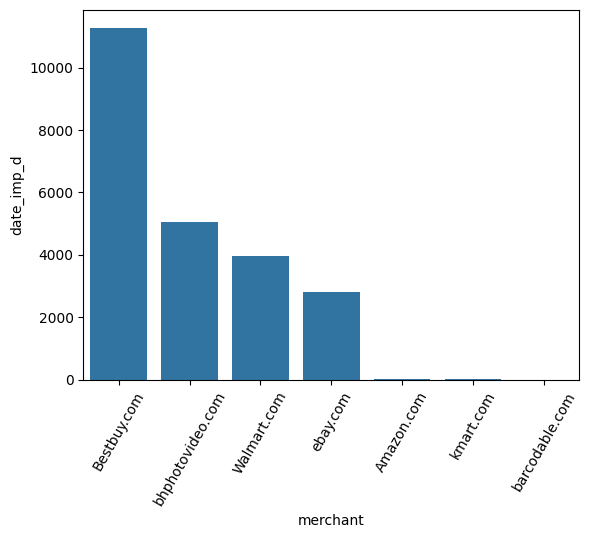

In [18]:
aux1 = df2[['date_imp_d', 'merchant']].groupby('merchant').count().reset_index().sort_values(by='date_imp_d', ascending=False)

plt.xticks(rotation=60)
sns.barplot(x='merchant', y='date_imp_d', data=aux1)

In [19]:
# seleção de lojas
df_best     = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp      = df2[df2['merchant'] == 'bhphotovideo.com']
df_walmart  = df2[df2['merchant'] == 'Walmart.com']
df_ebay     = df2[df2['merchant'] == 'ebay.com']

## 2.2. Qual a categoria mais vendida?

### 2.2.1. Categoria mais vendida no geral?

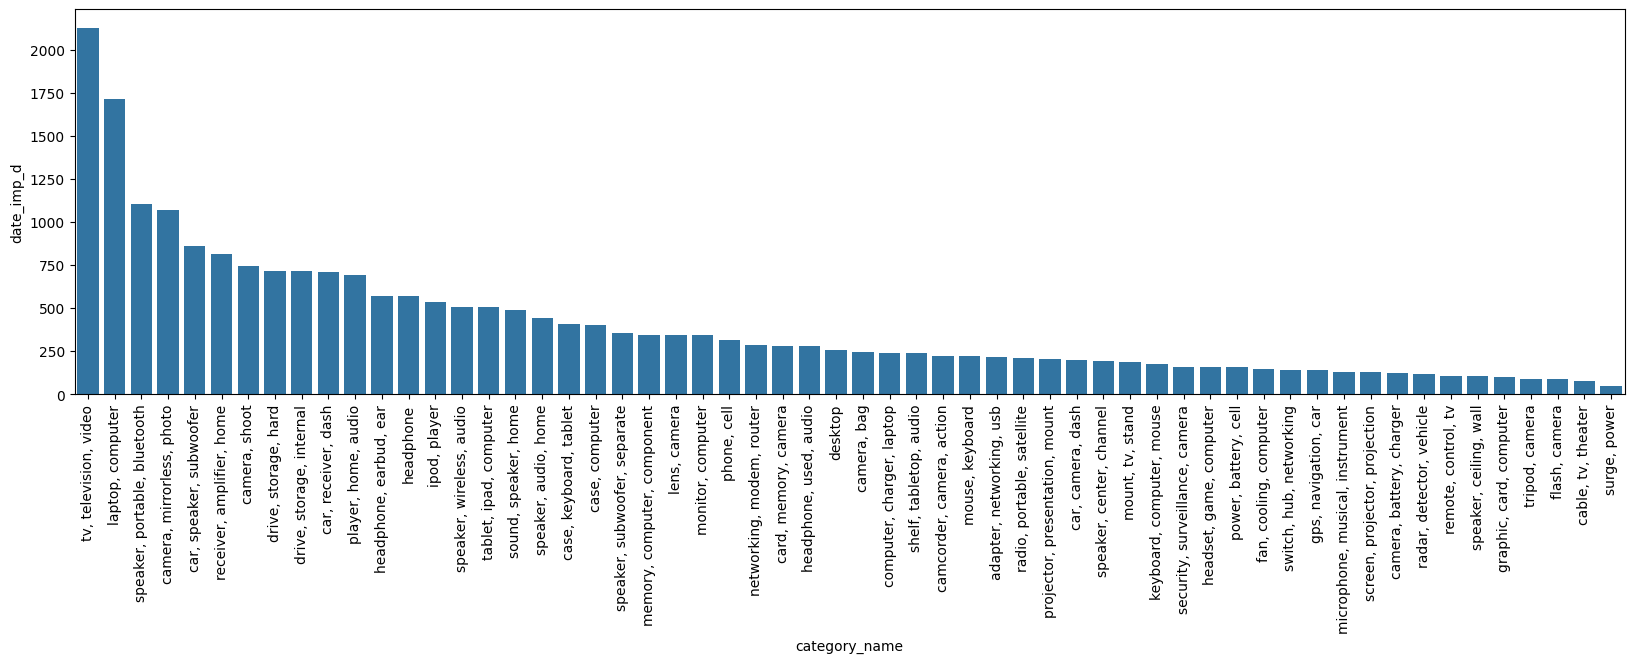

In [20]:
aux1 = df2[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)

plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x='category_name', y='date_imp_d', data=aux1 );

### 2.2.2. Categorias mais vendidas por loja

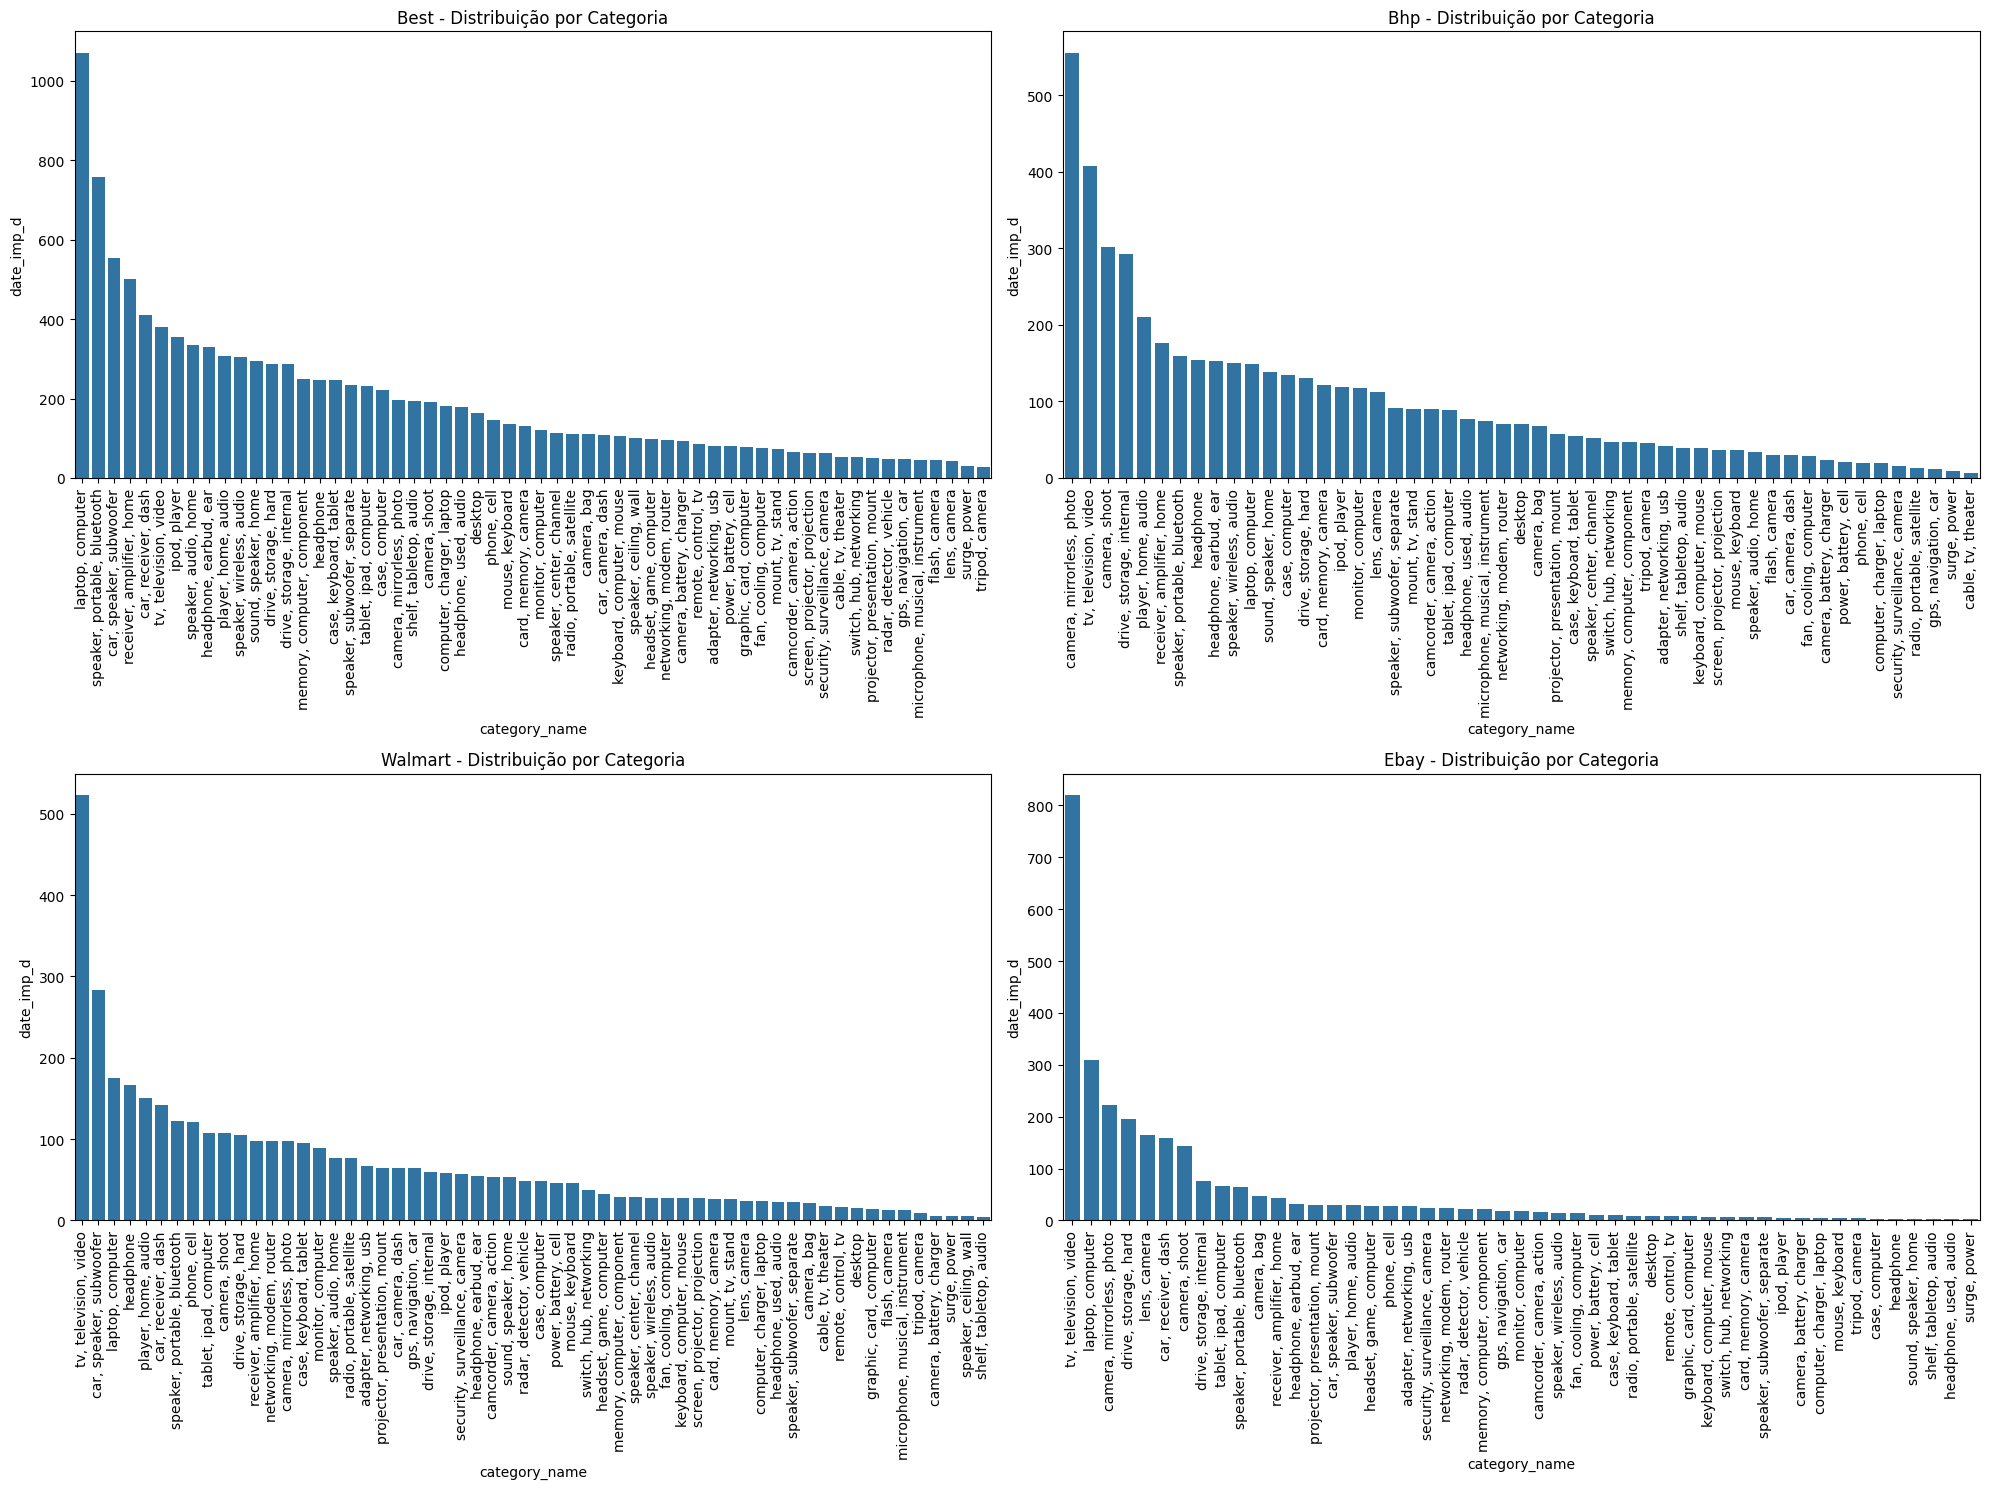

In [21]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
plt.title('Best - Distribuição por Categoria')
sns.barplot(x='category_name', y='date_imp_d', data=aux1);

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
plt.title('Bhp - Distribuição por Categoria')
sns.barplot( x='category_name', y='date_imp_d', data=aux2 );

plt.subplot(2, 2, 3)
aux3 = df_walmart[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
plt.title('Walmart - Distribuição por Categoria')
sns.barplot( x='category_name', y='date_imp_d', data=aux3 );

plt.subplot(2, 2, 4)
aux4 = df_ebay[['date_imp_d', 'category_name']].groupby('category_name').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=90)
plt.title('Ebay - Distribuição por Categoria')
sns.barplot( x='category_name', y='date_imp_d', data=aux4 );

plt.tight_layout()


## 2.3. Qual a marca mais vendida?

### 2.3.1. Marca mais vendida no geral

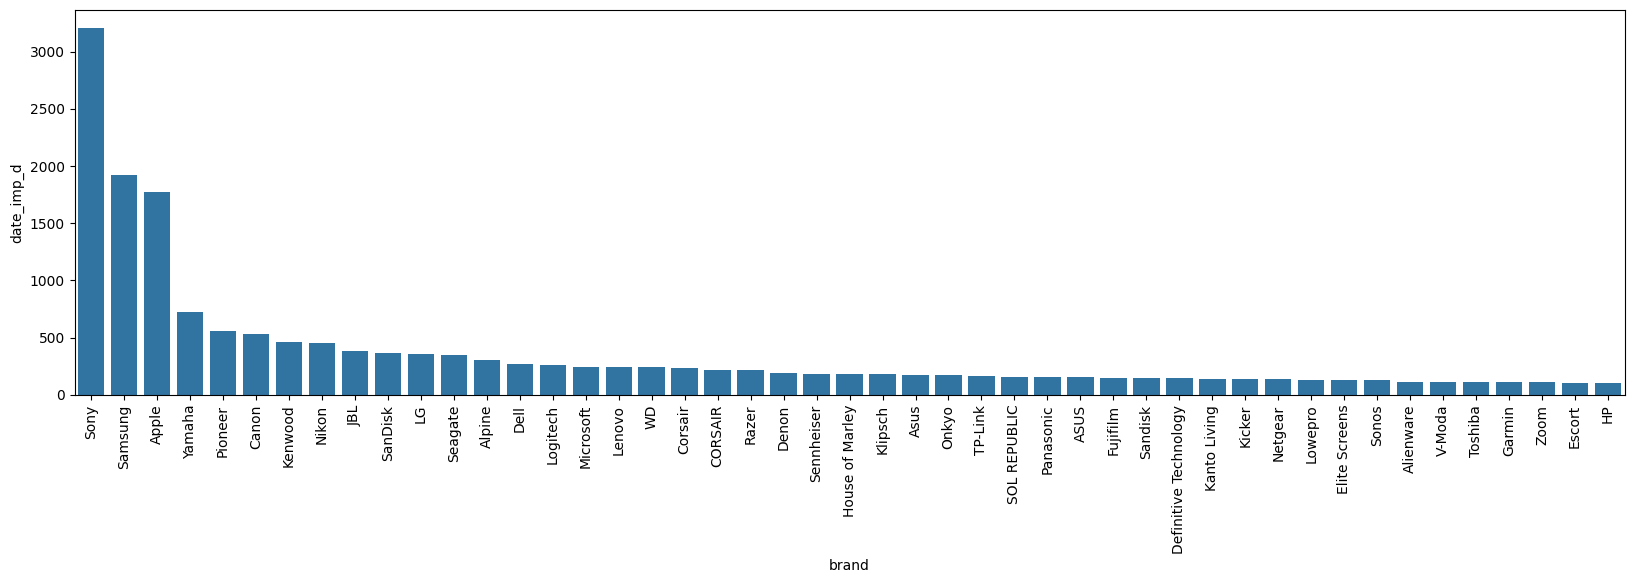

In [22]:
plt.figure(figsize=(20, 5))

aux1 = df2[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
aux1 = aux1[aux1['date_imp_d'] > 100]

plt.xticks(rotation=90)
sns.barplot(x='brand', y='date_imp_d', data=aux1);

### 2.3.2. Marca mais vendida por loja

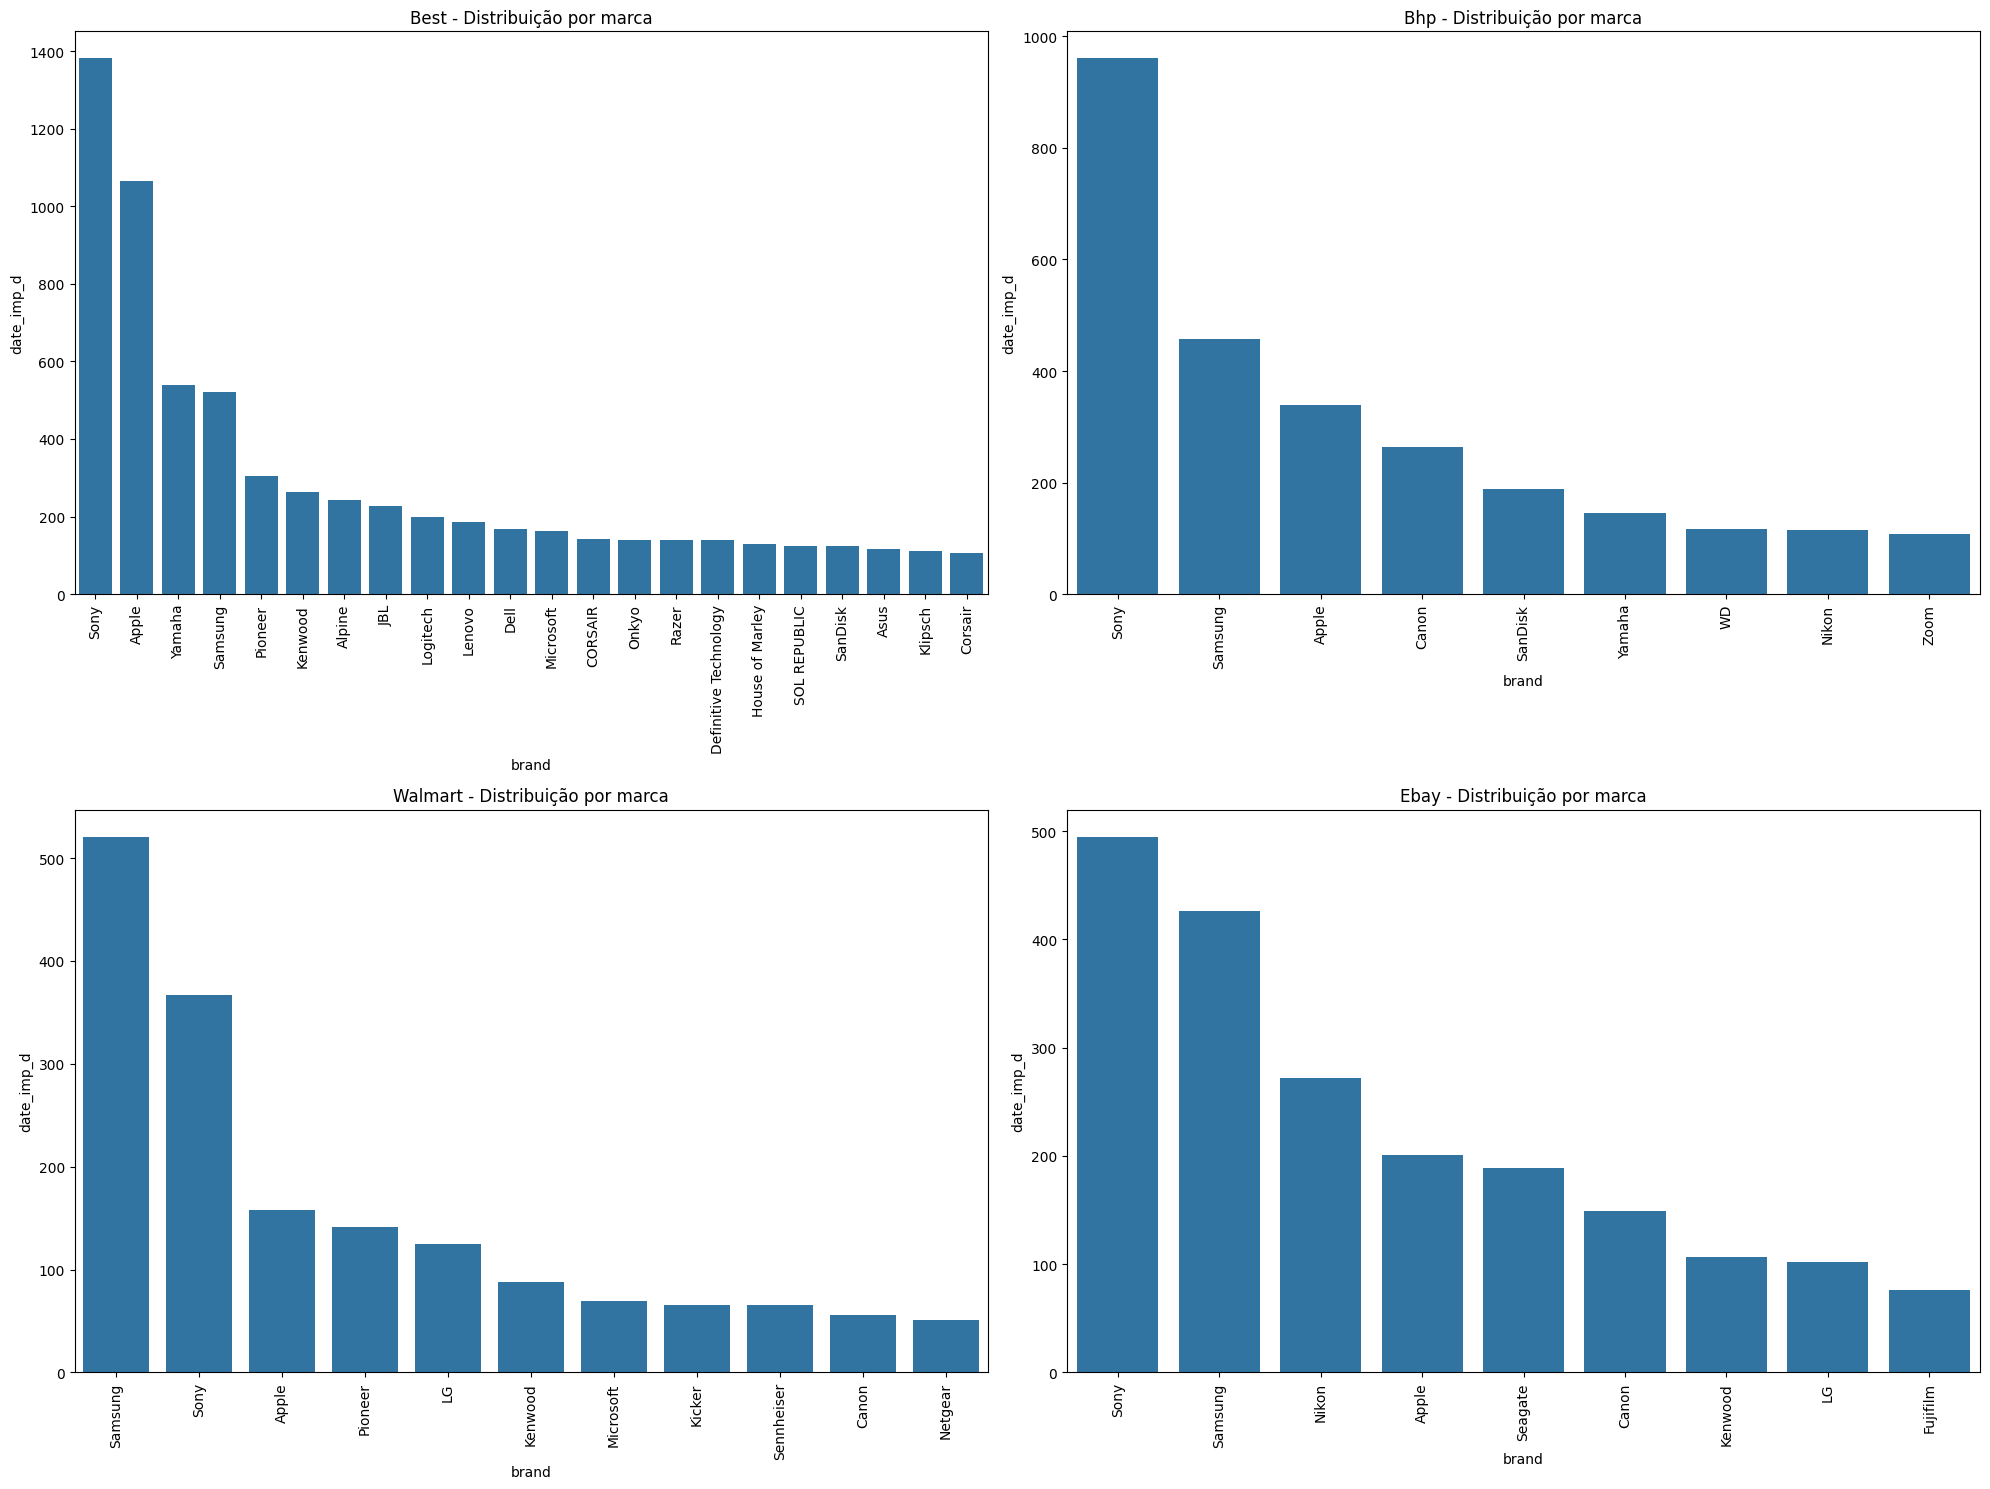

In [23]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
aux1 = aux1[aux1['date_imp_d'] > 100]
plt.xticks(rotation=90)
plt.title('Best - Distribuição por marca')
sns.barplot(x='brand', y='date_imp_d', data=aux1);

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
aux2 = aux2[aux2['date_imp_d'] > 100]
plt.xticks(rotation=90)
plt.title('Bhp - Distribuição por marca')
sns.barplot(x='brand', y='date_imp_d', data=aux2);

plt.subplot(2, 2, 3)
aux3 = df_walmart[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
aux3 = aux3[aux3['date_imp_d'] > 50]
plt.xticks(rotation=90)
plt.title('Walmart - Distribuição por marca')
sns.barplot(x='brand', y='date_imp_d', data=aux3);

plt.subplot(2, 2, 4)
aux4 = df_ebay[['date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='date_imp_d', ascending=False)
aux4 = aux4[aux4['date_imp_d'] > 50]
plt.xticks(rotation=90)
plt.title('Ebay - Distribuição por marca')
sns.barplot(x='brand', y='date_imp_d', data=aux4);

plt.tight_layout()

##  2.4. Quais os dias que mais vendem?

### 2.4.1 Dias que vendem mais geral

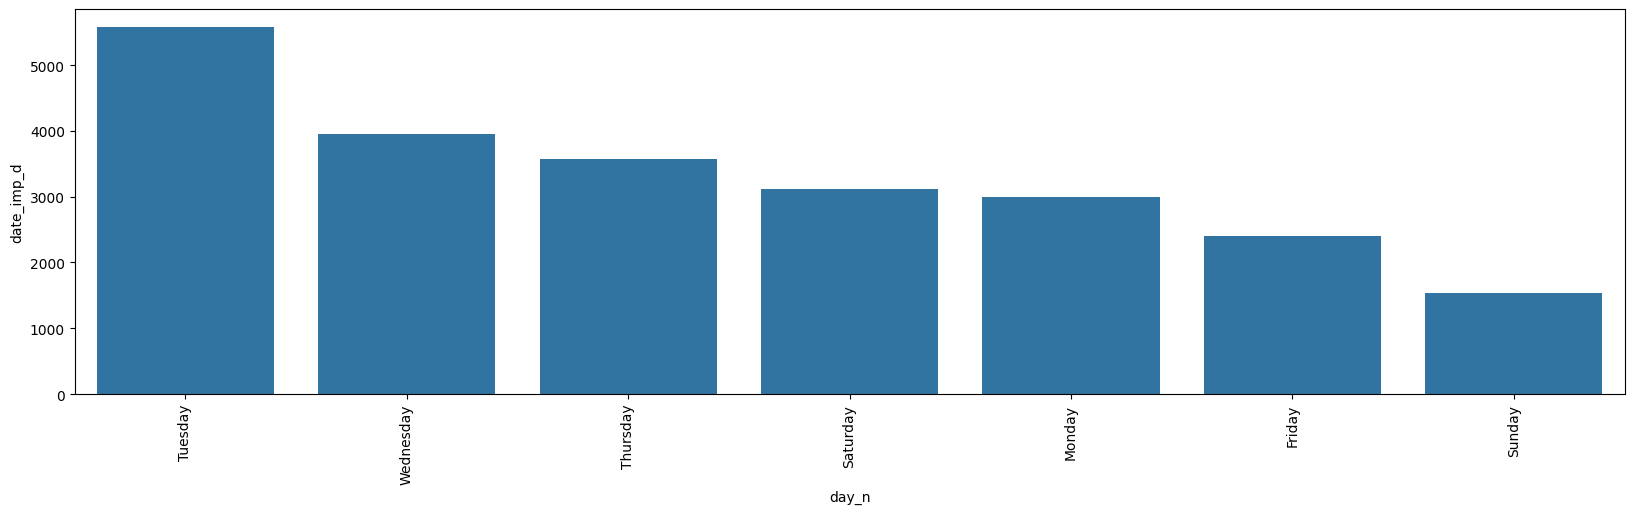

In [24]:
plt.figure(figsize=(20, 5))

aux1 = df2[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)

plt.xticks(rotation=90)
sns.barplot(x='day_n', y='date_imp_d', data=aux1);

### 2.4.2 Dias que vendem mais por loja

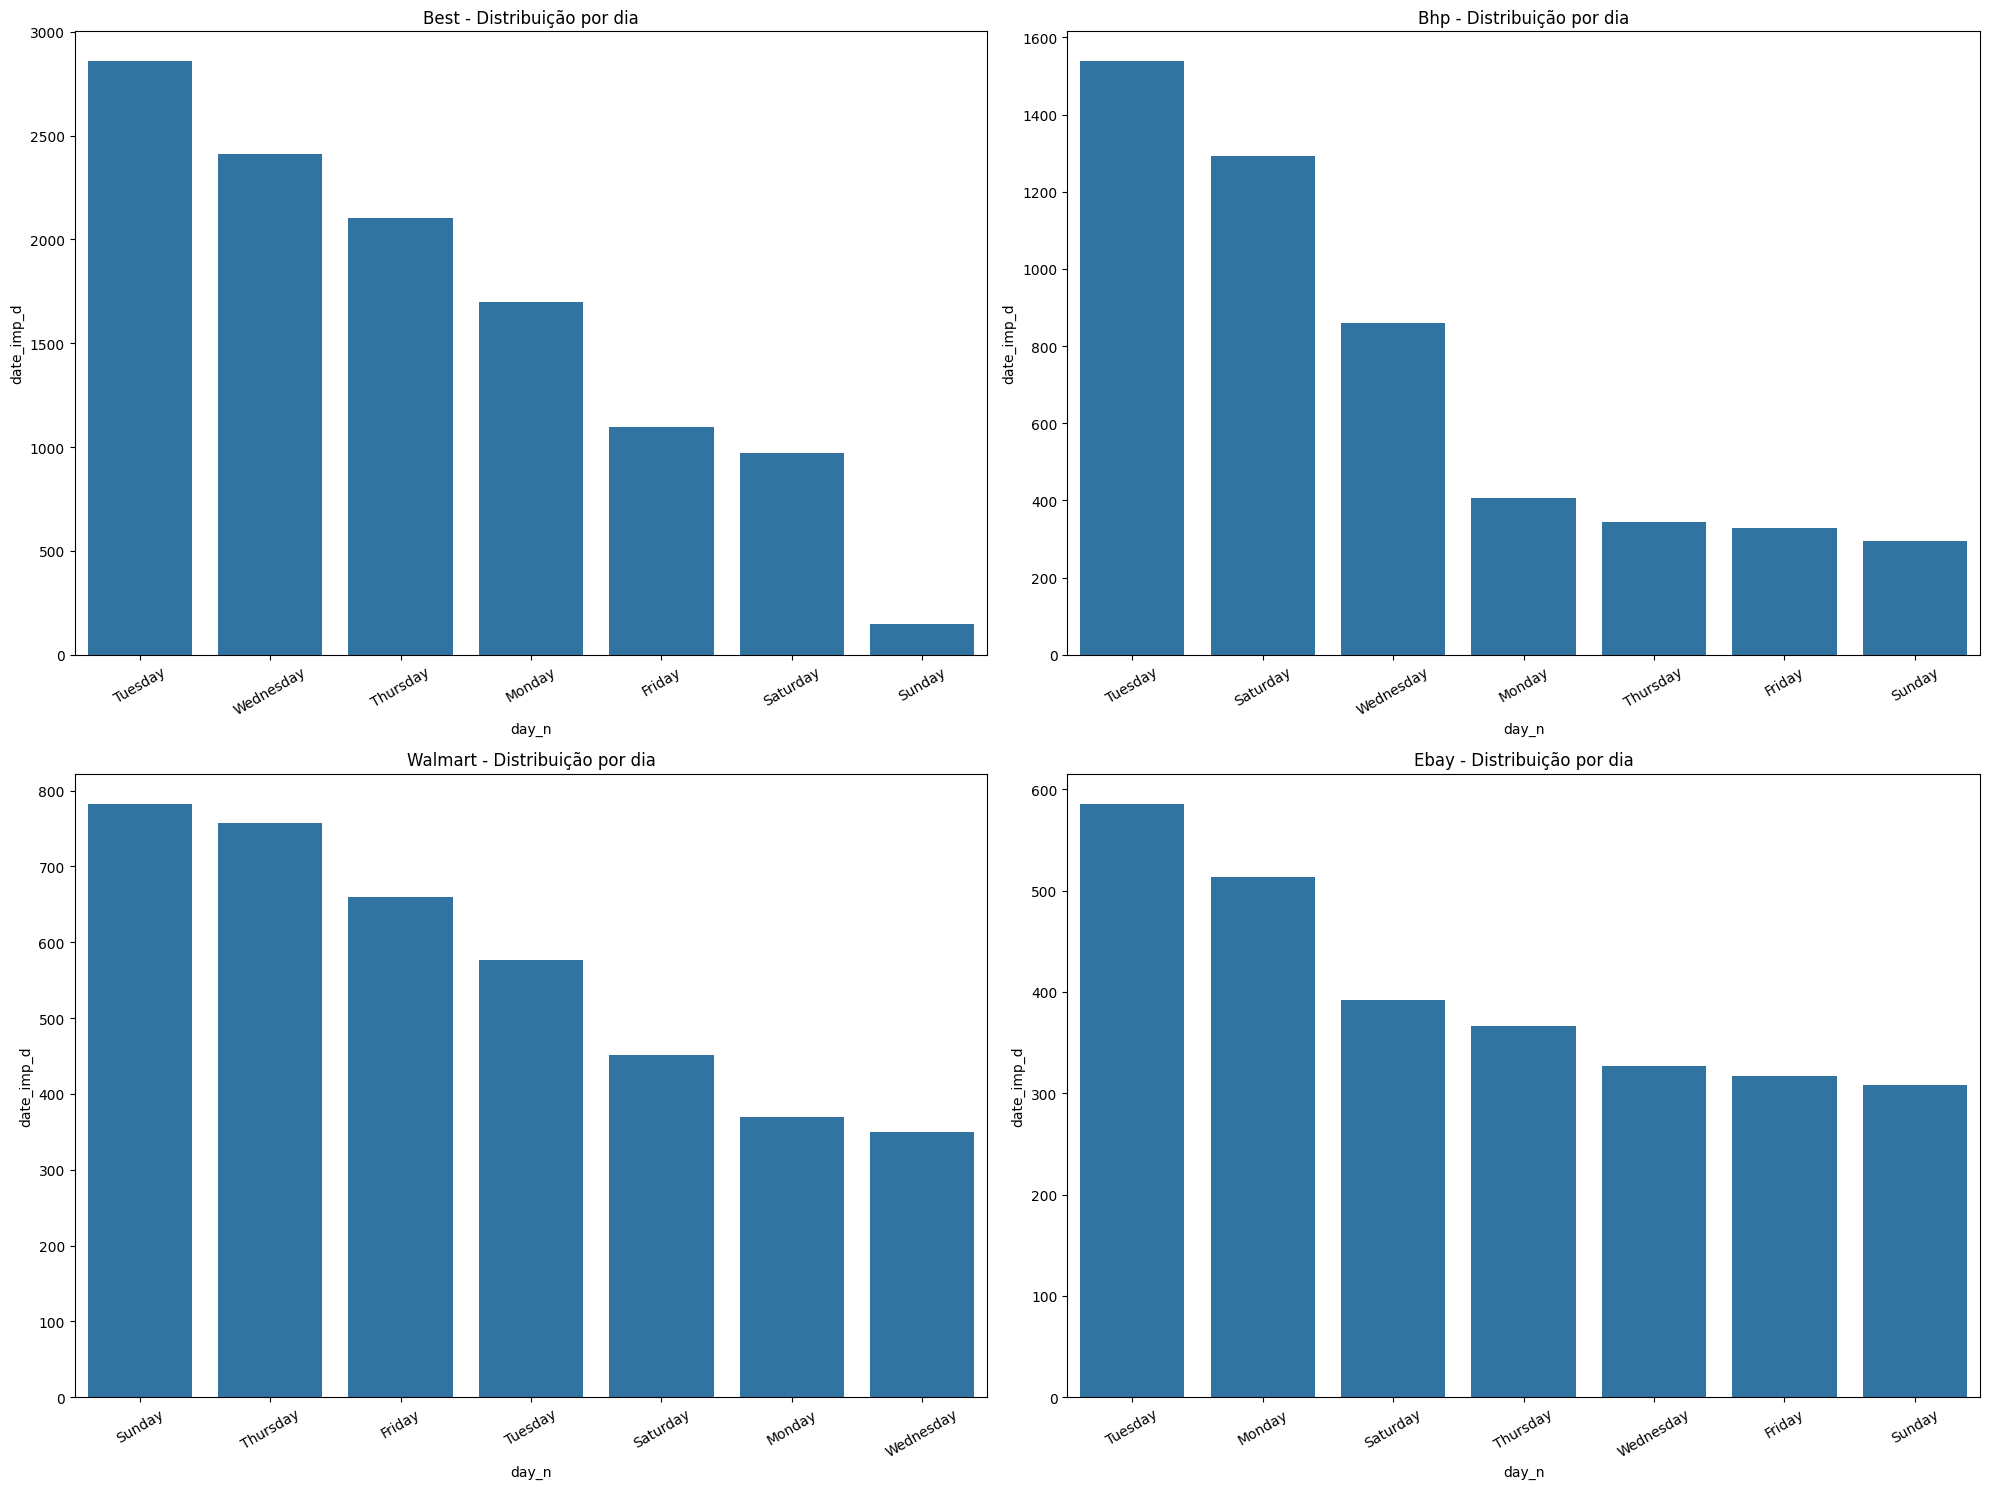

In [25]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Best - Distribuição por dia')
sns.barplot(x='day_n', y='date_imp_d', data=aux1 );

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Bhp - Distribuição por dia')
sns.barplot(x='day_n', y='date_imp_d', data=aux2 );

plt.subplot(2, 2, 3)
aux3 = df_walmart[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Walmart - Distribuição por dia')
sns.barplot(x='day_n', y='date_imp_d', data=aux3 );

plt.subplot(2, 2, 4)
aux4 = df_ebay[['date_imp_d', 'day_n']].groupby('day_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Ebay - Distribuição por dia')
sns.barplot( x='day_n', y='date_imp_d', data=aux4 );

plt.tight_layout()

## 2.5. Quais os meses que mais vendem?

### 2.5.1. Meses que mais vendem - Geral

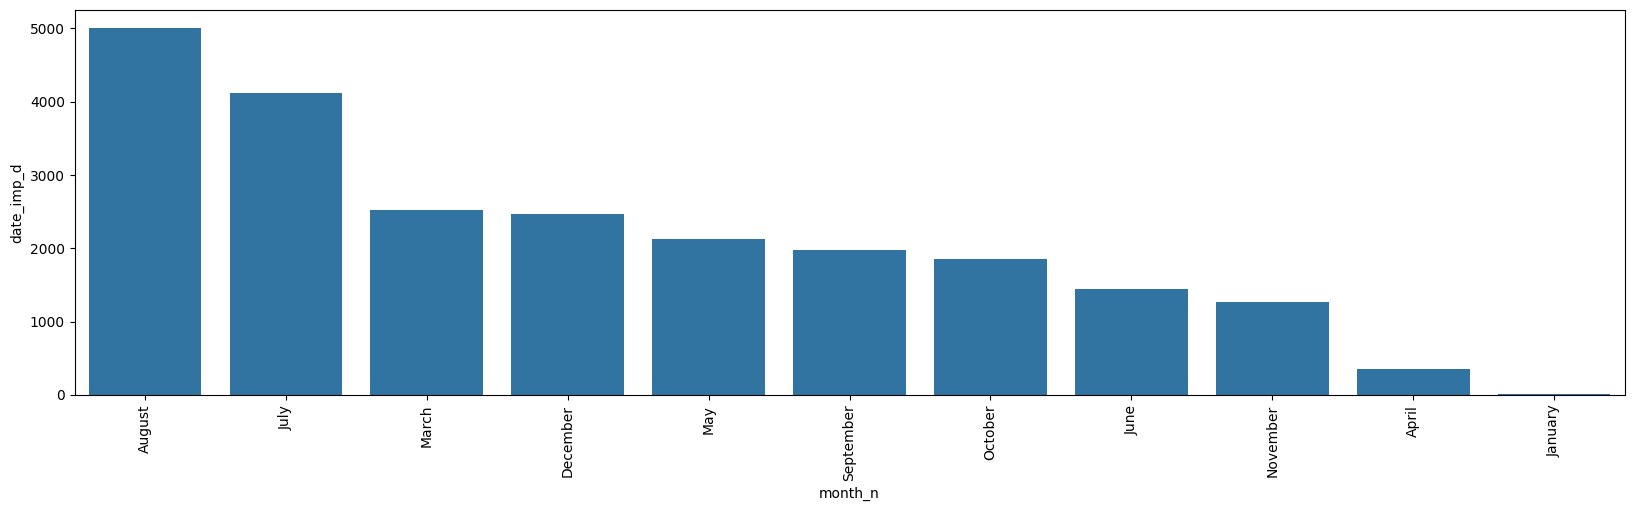

In [26]:
plt.figure(figsize=(20, 5))

aux1 = df2[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)

plt.xticks(rotation=90)
sns.barplot( x='month_n', y='date_imp_d', data=aux1 );

### 2.5.2. Meses que mais vendem - Por loja

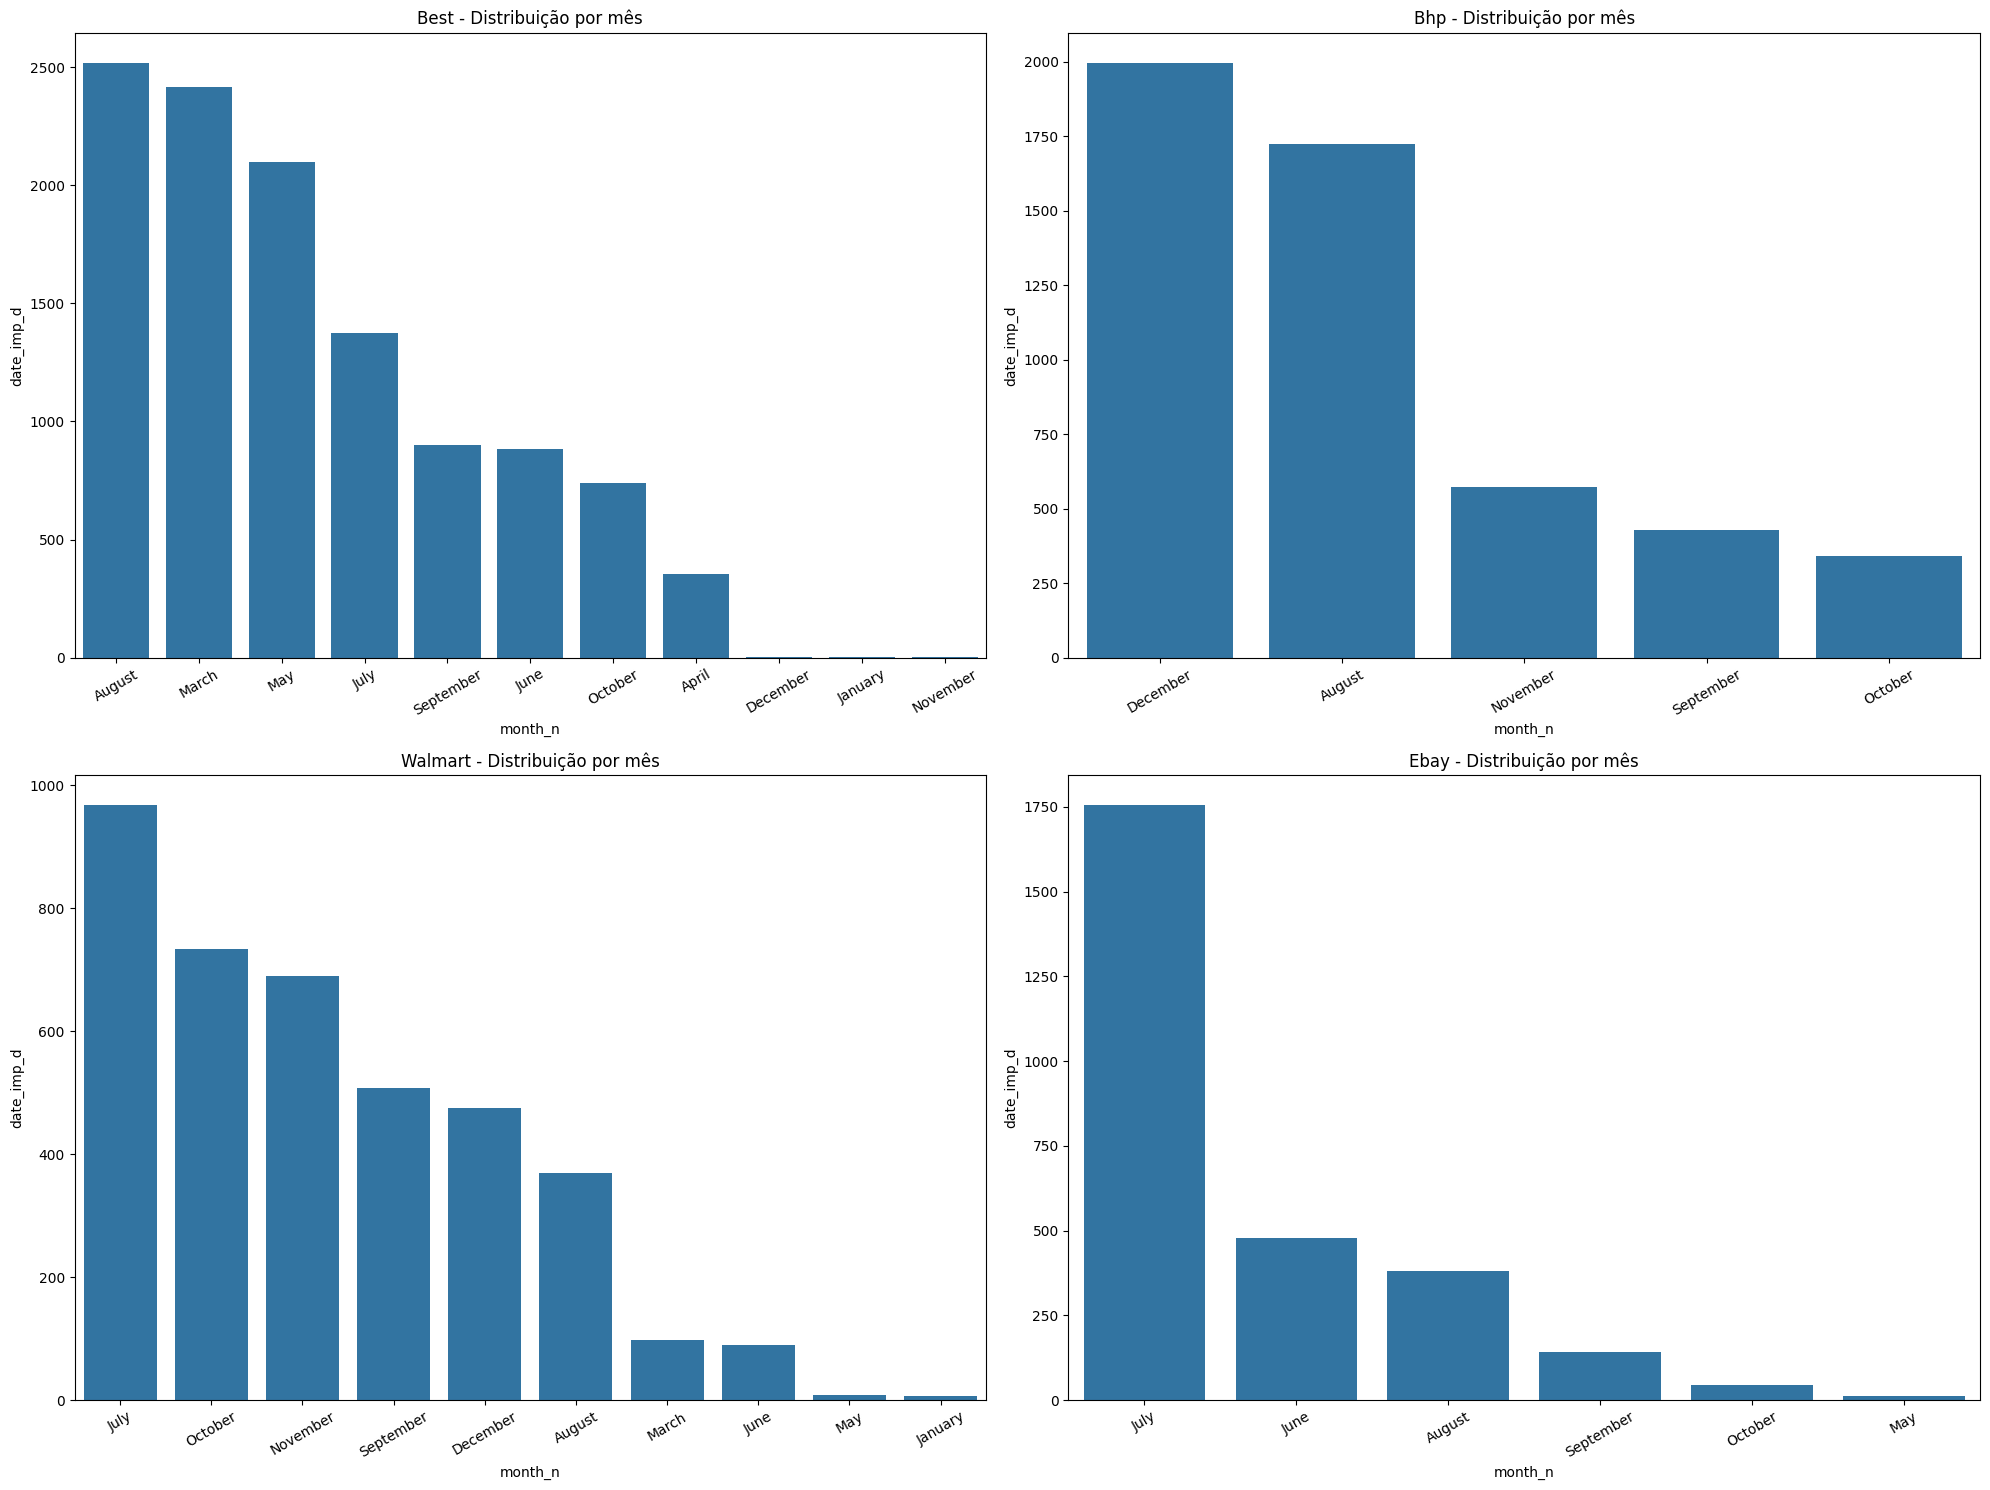

In [27]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Best - Distribuição por mês')
sns.barplot(x='month_n', y='date_imp_d', data=aux1 );

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Bhp - Distribuição por mês')
sns.barplot(x='month_n', y='date_imp_d', data=aux2 );

plt.subplot(2, 2, 3)
aux3 = df_walmart[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Walmart - Distribuição por mês')
sns.barplot(x='month_n', y='date_imp_d', data=aux3 );

plt.subplot(2, 2, 4)
aux4 = df_ebay[['date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Ebay - Distribuição por mês')
sns.barplot(x='month_n', y='date_imp_d', data=aux4 );

plt.tight_layout()

## 2.6. Quais as semanas que mais vendem?

### 2.6.1 Semanas que mais vendem - Geral

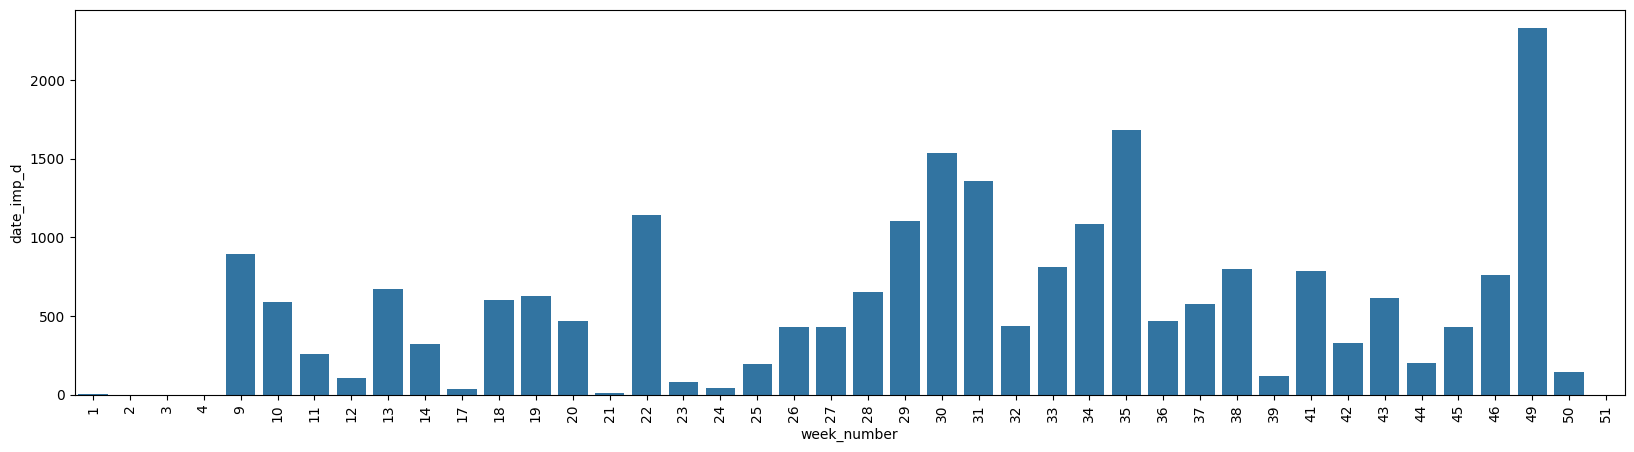

In [28]:
plt.figure(figsize=(20, 5))

aux1 = df2[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp_d', ascending=False)

plt.xticks(rotation=90)
sns.barplot(x='week_number', y='date_imp_d', data=aux1);

### 2.6.2 Semanas que mais vendem - Por Loja

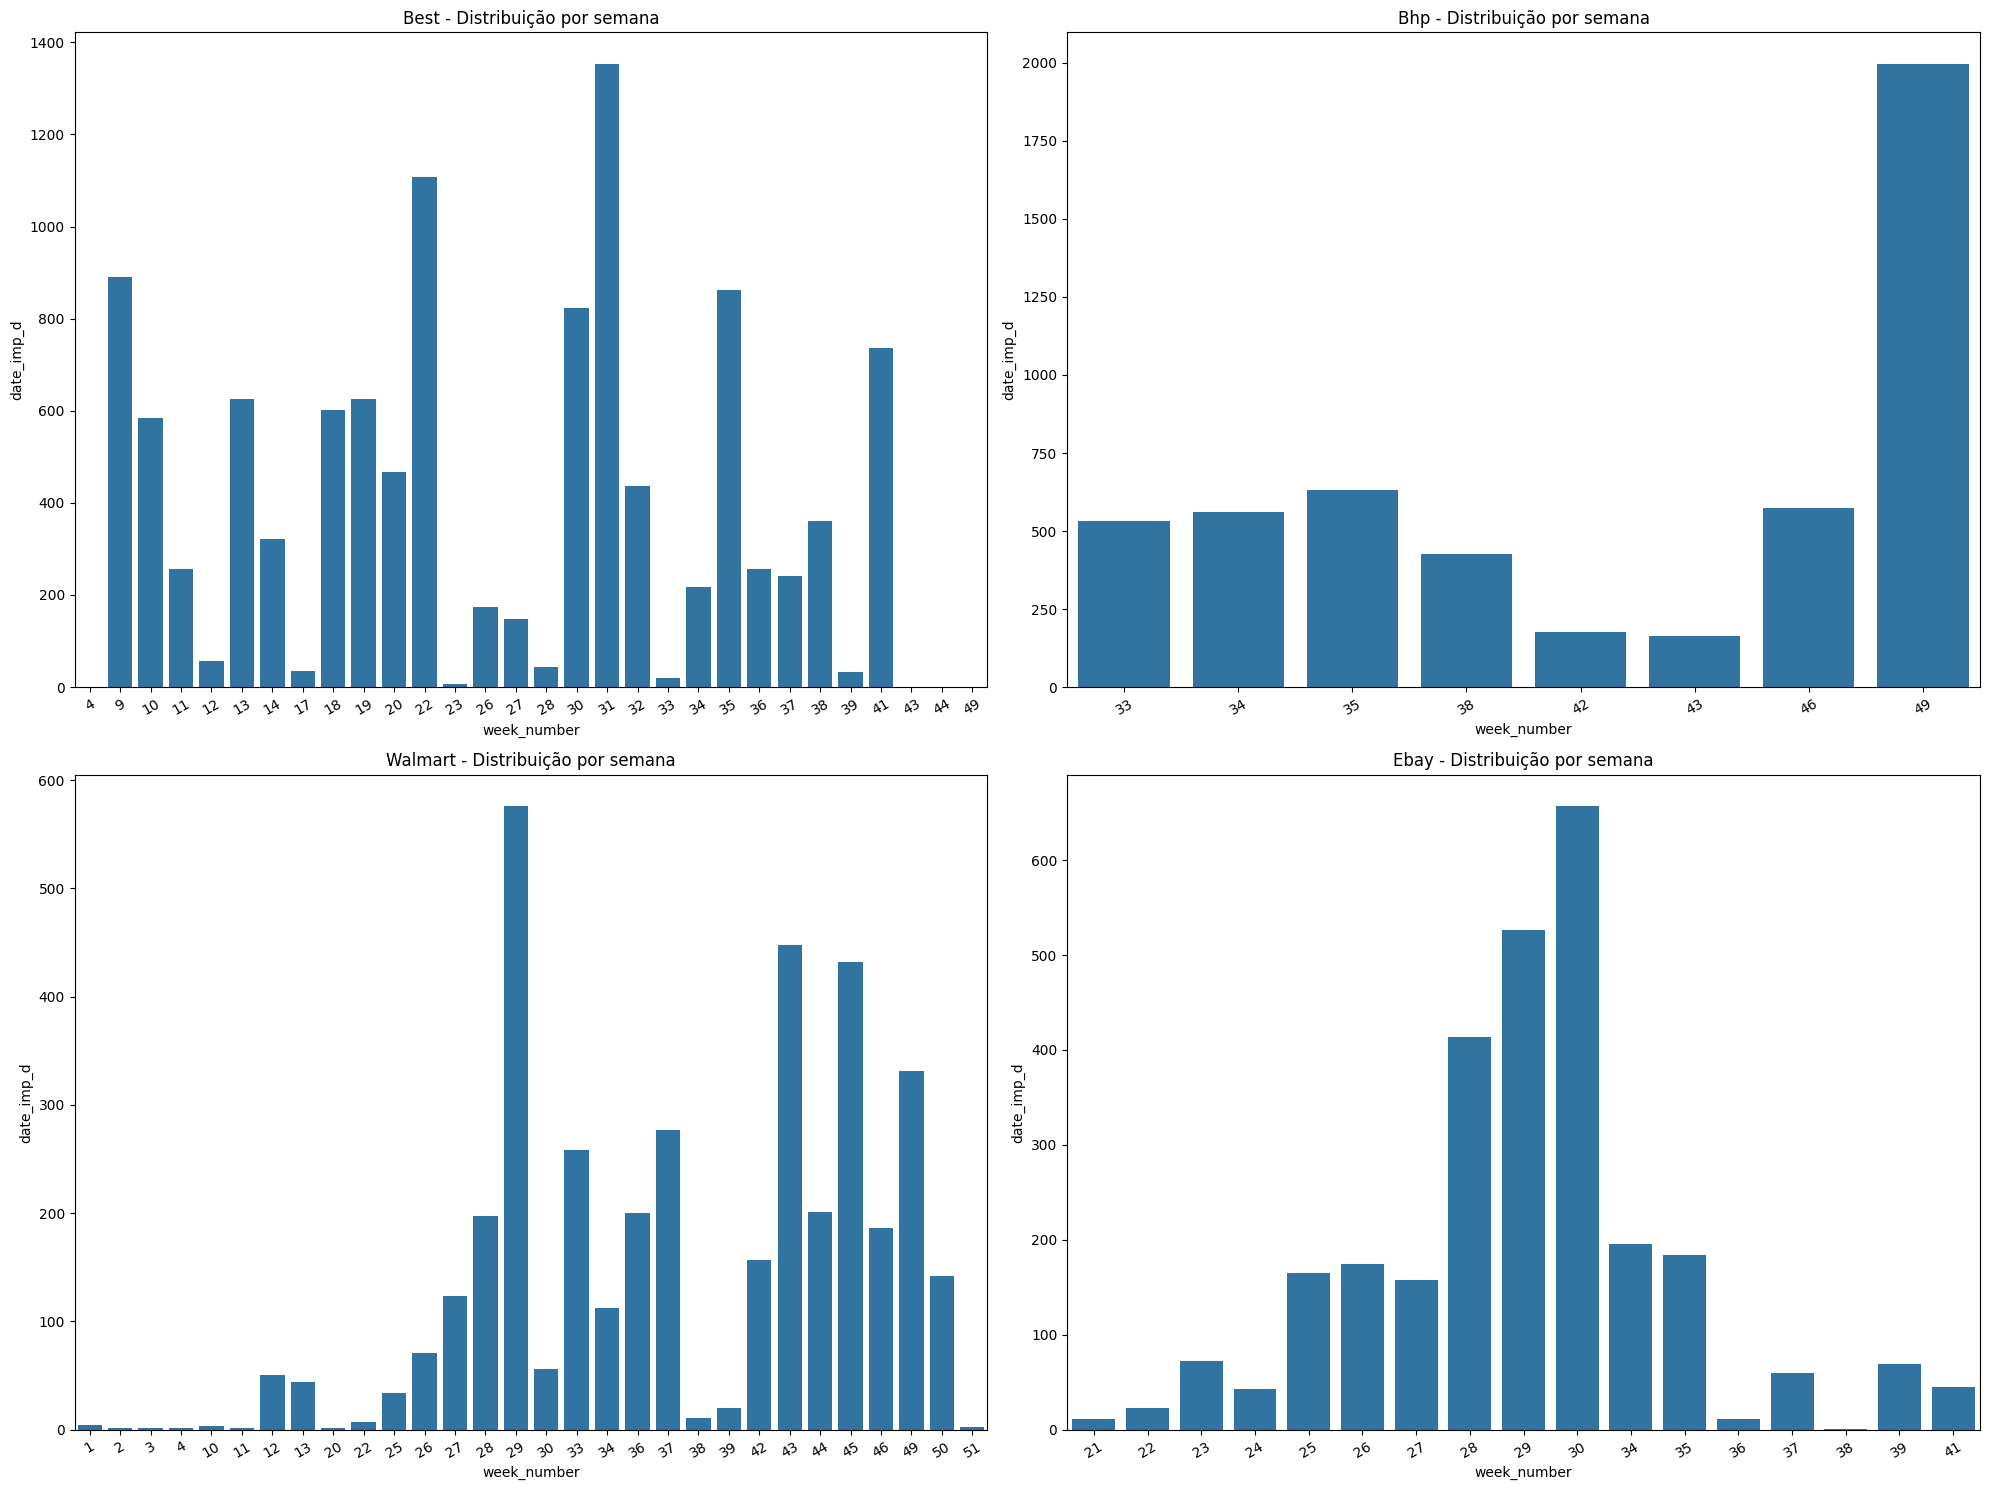

In [29]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
aux1 = df_best[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Best - Distribuição por semana')
sns.barplot(x='week_number', y='date_imp_d', data=aux1 );

plt.subplot(2, 2, 2)
aux2 = df_bhp[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Bhp - Distribuição por semana')
sns.barplot(x='week_number', y='date_imp_d', data=aux2 );

plt.subplot(2, 2, 3)
aux3 = df_walmart[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Walmart - Distribuição por semana')
sns.barplot(x='week_number', y='date_imp_d', data=aux3 );

plt.subplot(2, 2, 4)
aux4 = df_ebay[['date_imp_d', 'week_number']].groupby('week_number').count().reset_index().sort_values(by='date_imp_d', ascending=False)
plt.xticks(rotation=30)
plt.title('Ebay - Distribuição por semana')
sns.barplot(x='week_number', y='date_imp_d', data=aux4 );

plt.tight_layout()